# Introduction to Tensorflow,  and Tensorboard
Build a Convolutional Neural Network with Tensorflow.
The Notebook consists 4 parts:
  -  Data Preprocessing
  -  Defining CNN architecture 
  -  Training the Model
  -  Visualising Tensorboard Graph and Scalars

## CNN Overview
<img src="https://lh3.googleusercontent.com/8MwLqp2HFy4eHbFmyiqPQXN-f7jrfjWKdiek-iK2NpVj66XXTDhuG9tFAo76T1-90qZywvMEfZj_HwxmKmOT=w1366-h678-rw"  title="Convolutional Neural Network" />
[Convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks that has successfully been applied to analyzing visual imagery.


  
## Dataset Introduction
The Dataset used here is  MNIST handwritten digits. The dataset contains 42000 examples for training and 28,000 examples for testing. 

<img src="https://lh4.googleusercontent.com/hDbjLSXnv3P57OVZm35VTCqnIQJiPPL9-gOi3OAkfriPYKR5dMSe_fQDffJ5SRC_ZTn2f_6TeA1f0uRVcqO4=w1366-h678"  title="MNIST DataSet" />

## Importing Libraries


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from tensorflow.python.keras import utils
from tensorflow.python.keras.preprocessing import image
import plotly
import plotly.graph_objs as go
import seaborn as sns
from IPython.display import Image
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
plotly.offline.init_notebook_mode(True)

/home/sanjay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading the Data
We read data provided in csv format. The train.csv file contains 42000 rows and 785 columns. Each row represents an image of a handwritten digit and a label with the value of this digit.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Checking for null or missing data using pandas inbuilt function__

In [3]:
train.isnull().any().any()

False

In [4]:
test.isnull().any().any()

False

The given data is pretty clean and does not have any null or missing value.


## Seperating Labels from features

In [5]:
labels = train['label']
train = train.drop(['label'], axis=1)

## Countplot for Labels

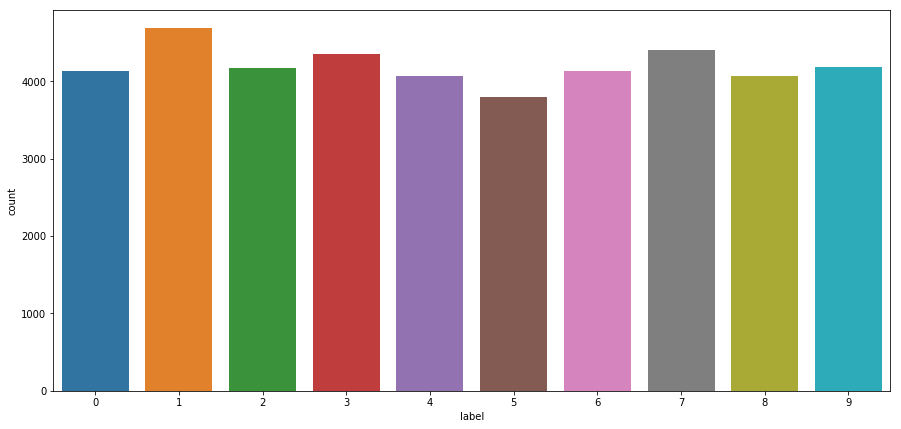

In [6]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot(labels)

We can see that we have almost balanced labels for each class.

## Viewing some example

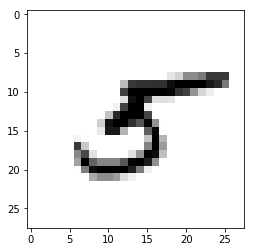

In [7]:
def show_img(img):
    img = img.values.reshape(28,28)
    plt.imshow(img,cmap=cm.binary)

show_img(train.iloc[80])

## Normalisation

In [8]:
train /= 255.0
test /= 255.0

We can see now the image is more clearer and boundaries are more specific.

## Reshaping Array
Reshaping the array for input to CNN. Initial it was given in 1-d array format (784), so it is changed in 3-d array of shape (28 $*$ 28 $*$ 1) because CNN takes 3-d input.

In [9]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## Changing labels to one-hot vectors

The given labels are in numerical format (0-9), we convert it into one hot vectors.

e.g for 5 we get our one hot vector as  [0,0,0,0,0,1,0,0,0,0]

In [10]:
labels = utils.to_categorical(labels)

## Splitting Data for training and Validation

Using train_test_split function from sklearn we divide our data into training and validation dataset in ratio of 0.1.

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size = 0.1)

## Defining Convolution and max pool function
We define our convolution block with zero padding and strides/step = 1.The activation function used here is relu.In general relu is used as activation function because it is a very simple non linear function and it reduces calculation.
Max pooling is used for downsampling of the data. 2x2 max-pooling splits the image into square 2-pixel blocks and only keeps maximum value for each of those blocks.

In [12]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

## Defining the tensorflow graph
The model architecture depends upon the problem. In this problem we have to identify the digit. The digit is identified just by looking at it's shape. Shape is a very low level feature in CNN. In general the first few layers of CNN identifies shapes of input. So we define a very shallow CNN model instead of going for a deep CNN model. 

Model architecture :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Layer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Output Shape
  -  Input &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(28$*$28$*$1)
  -  Conv1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (28$*$28$*$32)&nbsp;&nbsp;&nbsp; (32 are the number of feature maps) 
  -  Maxpool &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(14$*$14$*$32) &nbsp;&nbsp;(Reduces the dimensions to half it's previous value)
  -  Conv2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (14$*$14$*$64) (64 are the number of feature maps of 2nd Conv layer)
  -  Maxpool &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (7$*$7$*$64) 
  -  Fully-connected layer &nbsp;&nbsp;&nbsp; (1024) 
  -  Dropout &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1024)
  -  Softmax Layer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (10) (10 Output Classes)

## Dropout
[Dropout](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.It removes some nodes from the network at each training stage. Each of the nodes is either kept in the network with probability keep_prob or dropped with probability 1 - keep_prob. After the training stage is over the nodes are returned to the NN with their original weights.

## Learining Rate and Optimizer

The learninig rate used here is [exponential decay](https://www.tensorflow.org/api_docs/python/tf/train/exponential_decay). It decays after 10,000 steps. Initial rate is taken as 0.001.


The optimizer is [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) with standard value of Beta1 $=$ 0.9 and Beta2 $=$ 0.999.


In [13]:
batch_size = 16
patch_size = 5
image_size = 28
num_labels = 10
num_channels = 1
graph = tf.Graph()
with graph.as_default():
    global_step = tf.Variable(0, trainable=False)
  
        # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(X_val, dtype=tf.float32)
    tf_test_dataset = tf.placeholder(tf.float32, shape=(None, image_size, image_size, num_channels))
  
        # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, 32], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([32]))
    
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, 32, 64], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[64]))
    
    layer3_weights = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[1024]))

    layer4_weights = tf.Variable(tf.truncated_normal([1024, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def model(data, dropout):
        conv1 = conv2d(data, layer1_weights, layer1_biases)
        conv1 = maxpool2d(conv1, k=2)
        conv2 = conv2d(conv1, layer2_weights, layer2_biases)
        conv2 = maxpool2d(conv2, k=2)
        fullyconnected1 = tf.reshape(conv2, [-1, layer3_weights.get_shape().as_list()[0]])
        fullyconnected1 = tf.add(tf.matmul(fullyconnected1, layer3_weights), layer3_biases)
        fullyconnected1 = tf.nn.relu(fullyconnected1)
        fullyconnected1 = tf.nn.dropout(fullyconnected1, dropout)
        output = tf.add(tf.matmul(fullyconnected1, layer4_weights), layer4_biases)
        return output
  
    # Training computation.
    logits = model(tf_train_dataset, 0.75)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_train_labels, logits=logits))

    learning_rate = tf.train.exponential_decay(0.001, global_step=global_step,
                                           decay_steps = 4000, decay_rate = 0.96, staircase=False)
    
    # Optimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, beta2=0.999).minimize(loss, global_step= global_step)
    # Predictions for the training, validation, and test data.
    
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset, 1))
    test_prediction = tf.nn.softmax(model(tf_test_dataset, 1))

## Defining the accuracy function

In [14]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

## Training the Tensorflow graph

In [15]:
num_steps = 10001
valid_accuracy_list = []
train_accuracy_list = []
step = []
loss_list = []
learning_rate_list = []
with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    summary_writer = tf.summary.FileWriter('./logg',
                                      sess.graph)
    print('Initialized')
    for global_step in range(num_steps):
        offset = (global_step * batch_size) % (Y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :, :, :]
        batch_labels = Y_train[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions,lr = sess.run(
            [optimizer, loss, train_prediction, learning_rate], feed_dict=feed_dict)
        loss_list.append(l)
        learning_rate_list.append(lr)
        if (global_step % 1000 ==0):
            valid_accuracy = accuracy(valid_prediction.eval(), Y_val)
            train_accuracy = accuracy(predictions, batch_labels)
            print('Minibatch loss at step %d: %f' % (global_step, l))
            print('Minibatch accuracy: %.1f%%' % train_accuracy)
            print('Validation accuracy: %.1f%%' % valid_accuracy)
            valid_accuracy_list.append(valid_accuracy)
            train_accuracy_list.append(train_accuracy)
            step.append(global_step)
    output = []
    for i in range(28):
        batch_test = test[i*1000:(i+1)*1000 , :]
        output.append(sess.run([test_prediction], feed_dict={tf_test_dataset:batch_test}))

Initialized
Minibatch loss at step 0: 25.695131
Minibatch accuracy: 6.2%
Validation accuracy: 11.7%
Minibatch loss at step 1000: 0.057139
Minibatch accuracy: 100.0%
Validation accuracy: 91.0%
Minibatch loss at step 2000: 0.070227
Minibatch accuracy: 93.8%
Validation accuracy: 96.3%
Minibatch loss at step 3000: 0.108291
Minibatch accuracy: 93.8%
Validation accuracy: 97.9%
Minibatch loss at step 4000: 0.000353
Minibatch accuracy: 100.0%
Validation accuracy: 96.7%
Minibatch loss at step 5000: 0.006719
Minibatch accuracy: 100.0%
Validation accuracy: 98.0%
Minibatch loss at step 6000: 0.157763
Minibatch accuracy: 93.8%
Validation accuracy: 98.1%
Minibatch loss at step 7000: 0.035358
Minibatch accuracy: 100.0%
Validation accuracy: 98.0%
Minibatch loss at step 8000: 0.038879
Minibatch accuracy: 100.0%
Validation accuracy: 98.0%
Minibatch loss at step 9000: 0.004141
Minibatch accuracy: 100.0%
Validation accuracy: 98.2%
Minibatch loss at step 10000: 0.000041
Minibatch accuracy: 100.0%
Validatio


## Plotting Training Loss  , Learning Rate , Training and Validation Accuracy 


In [16]:
trace1 = go.Scatter(
    y = loss_list
)
layout = go.Layout(
    title='Loss',
    xaxis=dict(
        title='Step',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='loss',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [17]:
trace1 = go.Scatter(
    y = learning_rate_list
)
layout = go.Layout(
    title='Learning Rate',
    xaxis=dict(
        title='Step',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Learninig rate',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [18]:
trace1 = go.Scatter(
    x = step,
    y = train_accuracy_list,
    name = 'Training Accuracy'
)
trace2 = go.Scatter(
    x = step,
    y = valid_accuracy_list,
    name = 'Validation Accuracy'
)
data = [trace1, trace2]

plotly.offline.iplot(data)

## Tensorboard Visuals


__The tensorboard visuals can be obtained from running the notebook on local pc and running command 'tensorboard --logdir ./logg' __ 

## Tensorboard Graph
__Double Click on the graph to view it properly.__

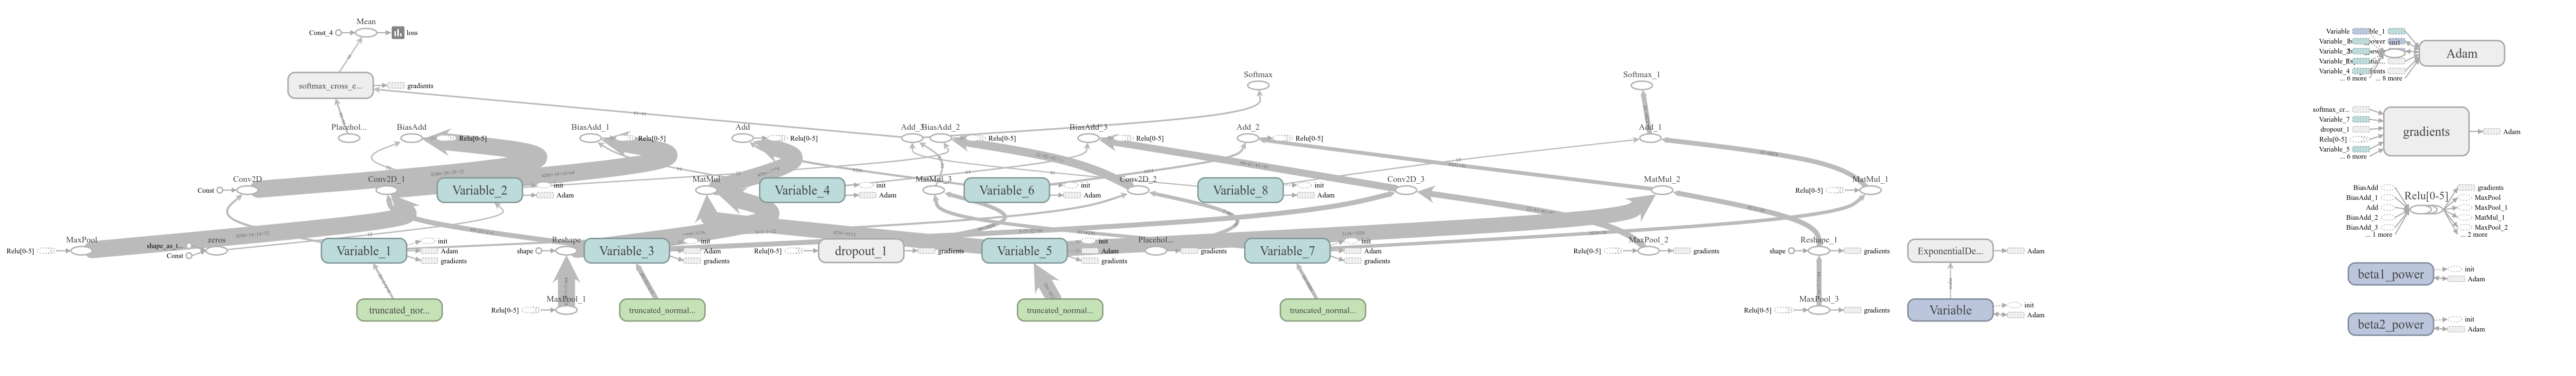

In [19]:
Image('graph.png')

In [20]:
submission = []
for i in range(28):
    for j in range(1000):
        submission.append(np.argmax(output[i][0][j]))

In [21]:
submission = pd.Series(submission, name="Label")

In [22]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

submission.to_csv("submission.csv",index=False)

In [23]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
